# File I/O

Chapter 7 of Py4E covers files and input/output (I/O).

For this chapter, some of the things may be easier to do in scripts on the cluster...

I've copied the Py4E sample code and data to `/ufrc/zoo6927/share/Class_Files/Py4E_files/code3`.

## File handles

Section 7.2 talks about opening files and has this figure:

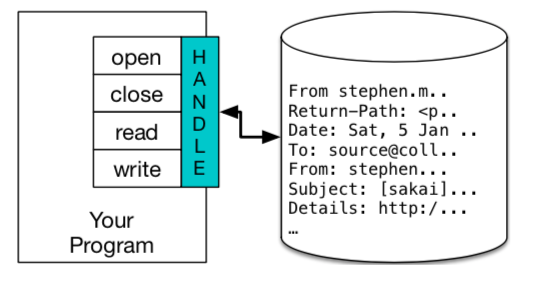

As noted in the text, **if** the `open` command is successful, what is returned is not the actual data, but a **file handle** to the file which can be used to read the data.

## Reading files

Look at `open.py`. **Note:** in class, I'll use the text editor vim because it shows contextual coloring. I suggest you stick with nano, Atom or other editors.

`open.py` reads the file line by line, which is usually a good thing. Sometimes, it can be helpful to have the whole file in memory, see the `fhand.read()` function on p. 82 of the PDF for an example of how to do this.


Look at `search1.py`. Notice the extra blank lines between the lines found. This is because the line itself has a new line character and that is printed in addition to the default new line after each print.

Py4E uses the `line.rstrip()` function to remove white space from the *right* side of the string to remove the line break. I typically use `line.strip()` to remove whitespace from either side.

## Section 7.6 Letting the user choose the file name

This section adds a prompt for user input. Look at `search6.py`.

This of course leads into the next section on using `try:` and `except:` if the file the user types doesn't exist.

Look at `search7.py`.

## Command line arguments: `argparse`

That's all well and good, but requires a user to be sitting there to type the name of the file to run the script on.

But what if we submit the script the a scheduler? Or we have 1,000 files to process? Do you want to type 1,000 file names???



`argparse` is the recommended command-line argument parser for python 3. There's a good [tutorial here](https://docs.python.org/3/howto/argparse.html).

I made a version of the `search7.py` script here: `/ufrc/zoo6927/share/Class_Files/Py4E_files/search7.argparse.py`

But here it is for clarity:
```python
#!/usr/bin/env python3

import argparse

parser = argparse.ArgumentParser(
            description="Count the Subject: lines in a mbox file")
parser.add_argument("file", 
            help="File to count Subject: lines")
args=parser.parse_args()



try:
    fhand = open(args.file)
except:
    print('File cannot be opened:', args.file)
    exit()
count = 0
for line in fhand:
    if line.startswith('Subject:'):
        count = count + 1
print('There were', count, 'subject lines in', args.file)```


We can look more at `argparse` later, but this is a valuable tool to learn as it allows you to pass arguments into your script from the command line.

## Section 7.8 Writing files

Writing to files is similar to reading them--we need to get a file handle.

There are two types of file handles for writing, Py4E warns you about how writing clears out the old data, but doesn't tell you about the other type...appending.

Kind of like the `>` redirect in Bash, `open('output.txt', 'w')` open the file for writing, which clears the contents of the file and then starts writing what you ask.

The `>>` double redirect equivalent in Python is `open('output.txt', 'a')` (**a** for **a**ppend). 